# Housing Price Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import ML_Modules
import warnings

warnings.filterwarnings('ignore')

### 1. Prepare and clean the dataset for modeling

In [2]:
# Load dataset
df = pd.read_excel('ML470_S9_KCHouse_Data_Practice.xlsx')

print("Dataset Columns:", df.columns.tolist())
print("Initial Data Info:")
print(df.info())

# Remove unimportant variables
df.drop(['id', 'date'], axis=1, inplace=True)

print("Data after dropping id and date:")
df.head()

Dataset Columns: ['id', 'date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15']
Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_living15  21613 non-null  int64  
 10  sqft_lot15     21613 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 1.8+ MB
None
Data after dropping id and date:


,price,bedrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_living15,sqft_lot15
0,221900,3,1180,5650,1.0,7,1180,1340,5650
1,538000,3,2570,7242,2.0,7,2170,1690,7639
2,180000,2,770,10000,1.0,6,770,2720,8062
3,604000,4,1960,5000,1.0,7,1050,1360,5000
4,510000,3,1680,8080,1.0,8,1680,1800,7503


### 2. Transform and categorize house prices

In [3]:
# Categorize price into quartiles
df['price_range'] = pd.qcut(df['price'], q=4, labels=['Low', 'Mid', 'Upper-Mid', 'High'])

# Encode price range labels numerically
le = LabelEncoder()
df['price_range_encoded'] = le.fit_transform(df['price_range'])

print("Price range categorization and encoding completed.")
df[['price', 'price_range', 'price_range_encoded']].head()

Price range categorization and encoding completed.


,price,price_range,price_range_encoded
0,221900,Low,1
1,538000,Upper-Mid,3
2,180000,Low,1
3,604000,Upper-Mid,3
4,510000,Upper-Mid,3


### 3. Assess and treat anomalies in numerical features

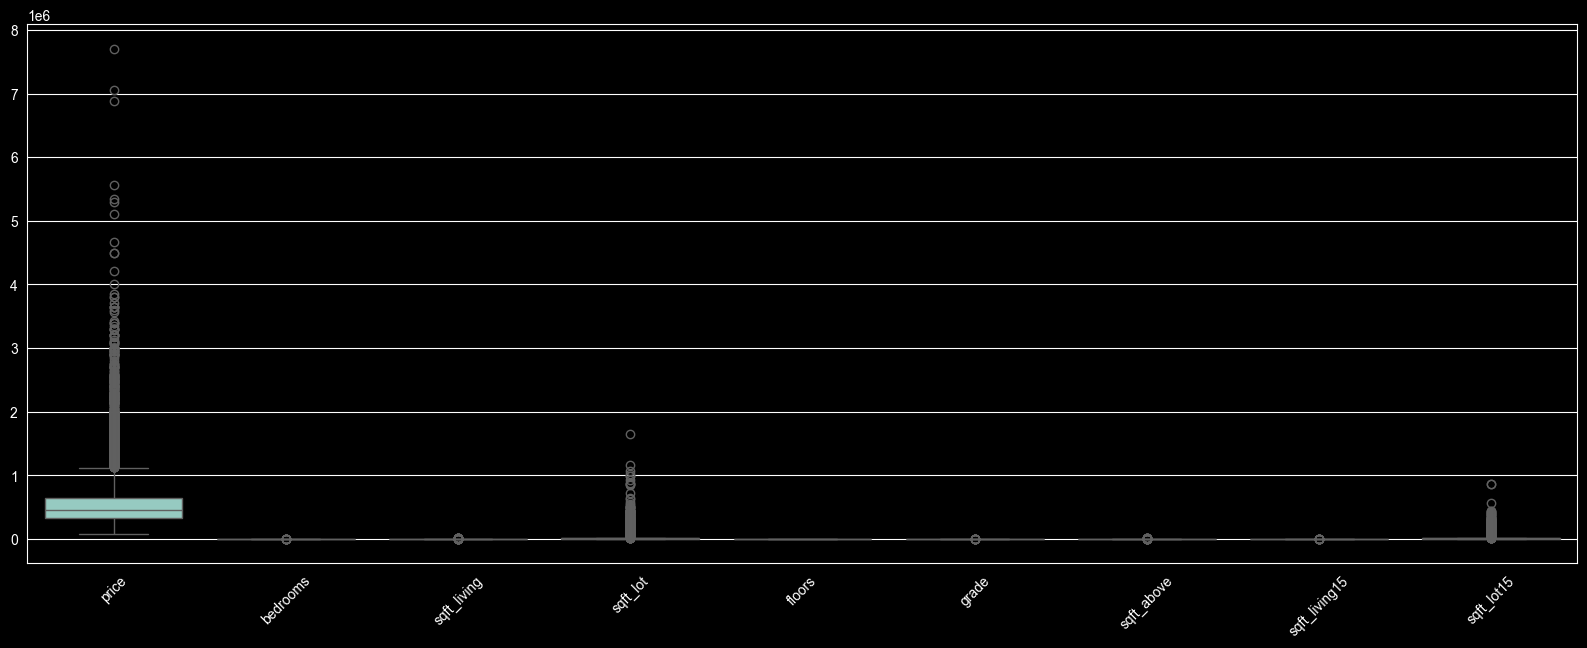

In [4]:
# Plotting boxplots to visualize outliers (as requested)
plt.figure(figsize=(20, 7))
sns.boxplot(data=df.drop(['price_range', 'price_range_encoded'], axis=1))
plt.xticks(rotation=45)
plt.show()

In [5]:
# Assess outliers using utility function
outlier_status = ML_Modules.assess_outliers(df.drop(['price_range'], axis=1))
print("Outlier Assessment:")
for col, has_outlier in outlier_status.items():
    print(f"{col}: {has_outlier}")

# Treat outliers using utility function
df_treated = ML_Modules.treat_outliers(df.drop(['price_range'], axis=1))
print("Outlier treatment completed.")

Outlier Assessment:
price: True
bedrooms: True
sqft_living: True
sqft_lot: True
floors: False
grade: True
sqft_above: True
sqft_living15: True
sqft_lot15: True
price_range_encoded: False
Outlier treatment completed.


### 4. Identify and resolve multicollinearity issues

In [6]:
# Compute correlations
correlation_matrix = df_treated.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Remove highly correlated features
df_selected = df_treated.drop(['sqft_living', 'sqft_lot'], axis=1)
print("Removed sqft_living and sqft_lot to resolve multicollinearity.")
print("Remaining columns:", df_selected.columns.tolist())

Correlation Matrix:
                        price  bedrooms  sqft_living  sqft_lot    floors  \
price                1.000000  0.352292     0.701143  0.172292  0.298720   
bedrooms             0.352292  1.000000     0.617376  0.194245  0.184460   
sqft_living          0.701143  0.617376     1.000000  0.348589  0.363894   
sqft_lot             0.172292  0.194245     0.348589  1.000000 -0.192408   
floors               0.298720  0.184460     0.363894 -0.192408  1.000000   
grade                0.686601  0.376826     0.743257  0.201319  0.477625   
sqft_above           0.602468  0.510376     0.868912  0.320532  0.542500   
sqft_living15        0.626354  0.422509     0.763878  0.391249  0.282338   
sqft_lot15           0.167142  0.183747     0.334951  0.910903 -0.195487   
price_range_encoded -0.385920 -0.133280    -0.289726 -0.119192 -0.073679   

                        grade  sqft_above  sqft_living15  sqft_lot15  \
price                0.686601    0.602468       0.626354    0.167142   

### 5. Scale input variables for uniformity

In [7]:
# Prepare features for scaling (dropping price related columns if they are targets)
X = df_selected.drop(['price', 'price_range_encoded'], axis=1)

# Scale numerical features
X_scaled = ML_Modules.data_scale(X)

print("Data scaling completed.")
print("Scaled data shape:", X_scaled.shape)
print("First 5 rows of scaled data:")
print(X_scaled[:5])

Data scaling completed.
Scaled data shape: (21613, 6)
First 5 rows of scaled data:
[[-0.42477128 -0.915427   -0.59787391 -0.77166761 -0.97862622 -0.60690427]
 [-0.42477128  0.93650577 -0.59787391  0.52412415 -0.43932178 -0.15106481]
 [-1.59561449 -0.915427   -1.59666417 -1.30830864  1.14777413 -0.05412158]
 [ 0.74607193 -0.915427   -0.59787391 -0.94182208 -0.94780882 -0.75587142]
 [-0.42477128 -0.915427    0.40091634 -0.11722732 -0.2698261  -0.18223332]]


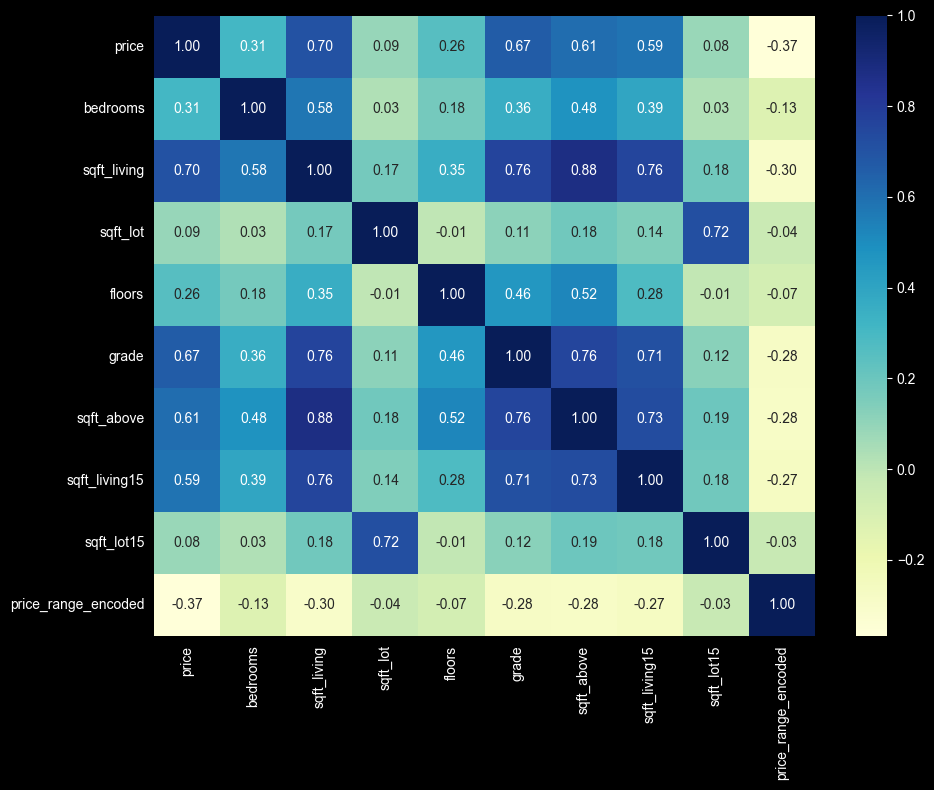

In [18]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(np.number).corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.tight_layout()